In [130]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [131]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)
df['Phenotypes'].unique()

array([2, 1, 0])

Filling missing values with the mean

In [132]:
df.fillna(df.mean(), inplace=True)

Performing PCA to reduce the number of features and visualizing the data

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
num_components = 10  # You can adjust this number based on your needs
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])
pca_df['Phenotypes'] = y

Visualize the data

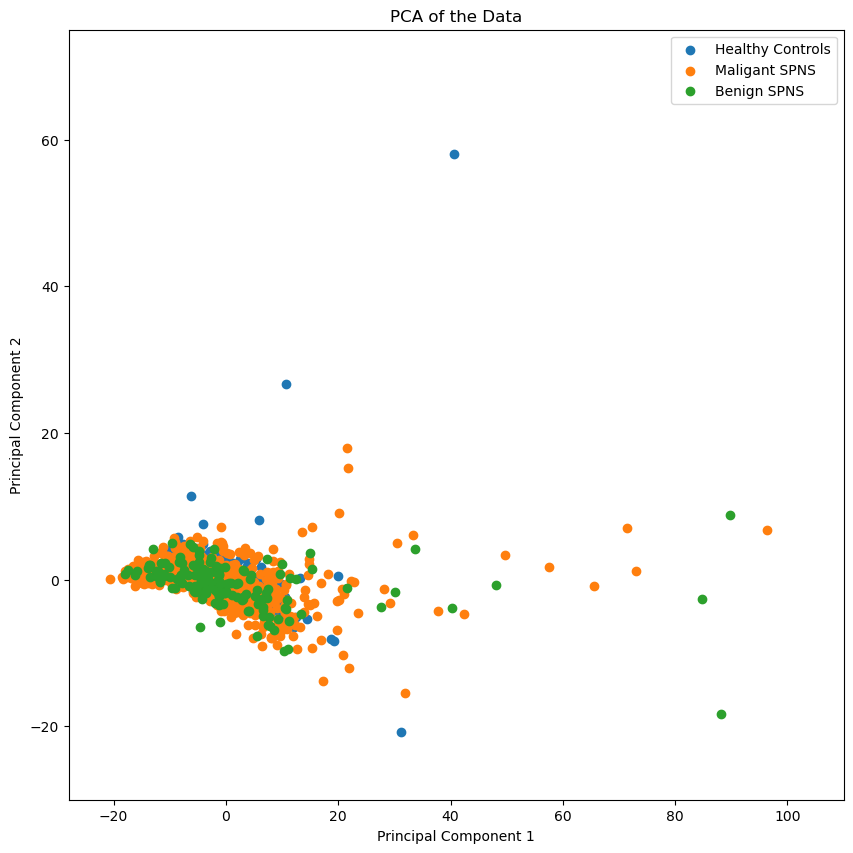

In [135]:
plt.figure(figsize=(10, 10))
labels = ['Healthy Controls', 'Maligant SPNS', 'Benign SPNS']  # Adjust labels based on your class labels
for i, label in enumerate(labels):
    plt.scatter(pca_df.loc[pca_df['Phenotypes'] == i, 'PC1'], pca_df.loc[pca_df['Phenotypes'] == i, 'PC2'], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim([-28, 110])
plt.ylim([-30, 75])
plt.title('PCA of the Data')
plt.legend()
plt.show()